In [1]:
import json
import numpy as np
import pandas as pd
from scipy.stats import kendalltau,pearsonr,spearmanr
from rouge_score import rouge_scorer, scoring
from evaluate import load
bert_score = load("bertscore")

def rouge(refs, preds):
    """
    Returns `t5` style ROUGE scores. See the related implementation:
    https://github.com/google-research/text-to-text-transfer-transformer/blob/3d10afd51ba97ac29eb66ae701eca274488202f7/t5/evaluation/metrics.py#L68
    :param refs:
        A `list` of reference `strs`.
    :param preds:
        A `list` of predicted `strs`.
    """
    rouge_types = ["rouge1", "rouge2", "rougeLsum"]
    scorer = rouge_scorer.RougeScorer(rouge_types)
    # Add newlines between sentences to correctly compute `rougeLsum`.

    def _prepare_summary(summary):
        summary = summary.replace(" . ", ".\n")
        return summary

    # Accumulate confidence intervals.
    aggregator = scoring.BootstrapAggregator()
    for ref, pred in zip(refs, preds):
        ref = _prepare_summary(ref)
        pred = _prepare_summary(pred)
        aggregator.add_scores(scorer.score(ref, pred))
    result = aggregator.aggregate()
    
    return {type: result[type].mid.fmeasure  for type in rouge_types}

def BertScore(refs, preds):
    bert_score_res = bert_score.compute(predictions=[preds], references=[refs], model_type="microsoft/deberta-xlarge-mnli", lang="en")
    return bert_score_res

2024-06-25 14:44:05.244415: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-25 14:44:05.291514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 14:44:06.032767: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_json('../../SummEval/model_annotations.aligned.paired.jsonl', lines=True)

In [5]:
dic = data.to_dict(orient='records')


# for i in range(10):
#     tmp = dic[i]['expert_annotations']
    
#     for j in tmp:
#         print(j['relevance'])
#     print("==================")\
# print(data.columns)

# print(data.iloc[0]['references'])

[{'coherence': 2, 'consistency': 1, 'fluency': 4, 'relevance': 2}, {'coherence': 1, 'consistency': 1, 'fluency': 2, 'relevance': 1}, {'coherence': 1, 'consistency': 1, 'fluency': 3, 'relevance': 2}]


In [8]:
# print(data.columns)

# print(data.iloc[1]["text"])

# print(data.iloc[1]["references"])

#get new dataset
#'coherence': 2, 'consistency': 1, 'fluency': 4, 'relevance': 2

def get_score(aspect, input_list):
    tmp = 0
    for i in input_list:
        tmp += i[aspect]
    return tmp/len(input_list)

def get_score_list(aspect, input_list):
    tmp = []
    for i in input_list:
        tmp.append(i[aspect])
    return tmp


dic = data.to_dict(orient='records')

model = (data["model_id"].unique()).tolist()


result = []

result_list_a = []
result_list_b = []
result_list_c = []
result_list_d = []
result_list_e = []

candidates = ['M17','M20','M22','M23']

for m in model:
    
    dic = data[data["model_id"] == m].to_dict(orient='records')
    
    a = []
    b = []
    c = []
    d = []
    e=  []
    
    
    for i in range(len(dic)):
        
        # tmp_list = get_score_list("coherence",dic[i]["expert_annotations"])
        
        # # print(tmp_list)
        # a.append(float(tmp_list[0]))
        # b.append(float(tmp_list[1]))
        # c.append(float(tmp_list[2]))
        
        
        tmp_list2 = get_score_list("coherence",dic[i]["turker_annotations"])
        
        a.append(float(tmp_list2[0]))
        b.append(float(tmp_list2[1]))
        c.append(float(tmp_list2[2]))
        d.append(float(tmp_list2[3]))
        e.append(float(tmp_list2[4]))
        
        
        # d.append(float((tmp_list[0]+tmp_list[1]+tmp_list[2]))/3)
    # e.append(kendalltau(a, b))
    # print(f"model:{m}, kendalltau correlation a b {kendalltau(a, b)}")
    result_list_a.append(float(np.mean(a)))
    result_list_b.append(float(np.mean(b)))
    result_list_c.append(float(np.mean(c)))
    result_list_d.append(float(np.mean(d)))
    result_list_e.append(float(np.mean(e))) 
    

# print(np.mean(e))
# print("kendalltau correlation a b ",kendalltau(a, b))
# print("kendalltau correlation a c ",kendalltau(a, c))
# print("kendalltau correlation b c ",kendalltau(b, c))
print(result_list_a)
print(result_list_b)
print(result_list_c)
print(result_list_d)
print(result_list_e)

print("system level kendalltau correlation a b ",kendalltau(result_list_a, result_list_b))

# print("----------------------------------------------")
# #pearsonr
# print("pearsonr correlation a b ",pearsonr(a, b))
# print("pearsonr correlation a c ",pearsonr(a, c))
# print("pearsonr correlation b c ",pearsonr(b, c))
# print("pearsonr correlation a d ",pearsonr(result_list_a, result_list_d))

# print("spearmanr correlation a d ",spearmanr(result_list_a, result_list_d))

# print(a)
# print(d)

#save filter data

# for i in range(len(dic)):
#     tmp_dic = {}
#     tmp_dic["article"] = dic[i]["text"]
#     tmp_dic["summary"] = dic[i]["decoded"]
#     tmp_dic["model"] = dic[i]["model_id"]
    
#     tmp_dic["expert_coherence"] = get_score("coherence",dic[i]["expert_annotations"])
#     tmp_dic["expert_relevance"] = get_score("relevance",dic[i]["expert_annotations"])
#     tmp_dic["expert_consistency"] = get_score("consistency",dic[i]["expert_annotations"])
#     tmp_dic["expert_fluency"] = get_score("fluency",dic[i]["expert_annotations"])
    
#     tmp_dic["turker_coherence"] = get_score("coherence",dic[i]["turker_annotations"])
#     tmp_dic["turker_relevance"] = get_score("relevance",dic[i]["turker_annotations"])
#     tmp_dic["turker_consistency"] = get_score("consistency",dic[i]["turker_annotations"])
#     tmp_dic["turker_fluency"] = get_score("fluency",dic[i]["turker_annotations"])
    
#     tmp_dic["all_coherence"] = (tmp_dic["expert_coherence"] + tmp_dic["turker_coherence"])/2
#     tmp_dic["all_relevance"] = (tmp_dic["expert_relevance"] + tmp_dic["turker_relevance"])/2
#     tmp_dic["all_consistency"] = (tmp_dic["expert_consistency"] + tmp_dic["turker_consistency"])/2
#     tmp_dic["all_fluency"] = (tmp_dic["expert_fluency"] + tmp_dic["turker_fluency"])/2
    
#     tmp_dic["references"] = dic[i]["references"]
    
#     result.append(tmp_dic)

# save to json
# with open('filter_annotations_summeval_reference.jsonl', 'w') as outfile:
#     json.dump(result, outfile, indent=4)
# print("done")    
# print(kendalltau([1,2,3,4,5],[2,3,4,5,4])) 
# print(pearsonr([1,2,3,4,5],[10,20,30,40,50]))
#    


[3.79, 3.8, 3.92, 3.97, 3.82, 3.81, 3.78, 3.65, 3.82, 3.83, 3.82, 3.85, 3.67, 3.86, 3.89, 3.75]
[3.79, 3.74, 3.94, 3.9, 3.77, 3.71, 3.8, 3.83, 3.64, 3.73, 3.74, 3.83, 3.73, 3.79, 3.91, 3.85]
[3.65, 3.78, 4.0, 4.04, 3.79, 3.82, 3.86, 3.69, 3.79, 3.71, 3.84, 3.94, 3.67, 3.84, 3.92, 3.78]
[3.7, 3.78, 3.89, 3.81, 3.78, 3.64, 3.76, 3.83, 3.78, 3.8, 3.78, 3.78, 4.01, 3.76, 3.87, 3.77]
[3.72, 3.73, 3.84, 3.91, 3.74, 3.83, 3.81, 3.8, 3.95, 3.79, 3.84, 3.81, 4.04, 3.91, 3.9, 3.7]
system level kendalltau correlation a b  SignificanceResult(statistic=0.1974267110060985, pvalue=0.29669283710822025)


In [13]:

def correlation_score(dict1, dict2):
    #system level
    tmp_list1 = []
    tmp_list2 = []
    for i in dict1.keys():
        tmp_list1.append(np.mean(dict1[i]))
        tmp_list2.append(np.mean(dict2[i]))
    print("correlation of system level is ", spearmanr(tmp_list1, tmp_list2)[0])
    
    #summary level
    # total_corr = 0
    
    # for i in dict1.keys():
    #     total_corr+=spearmanr(dict1[i], dict2[i])[0]
    # print("correlation of summary level is ", total_corr/len(dict1.keys()))
    

def correlation_score_per_system(list1, list2,keys):
    r = kendalltau(list1, list2)[0]
    print(f"model: {keys}, correlation is {r}")
    

dict1 = json.load(open('./LLM_evaluation_correlation_with_human/Rouge/human_score_filter_annotations_summeval_expert_coherence_eva.json'))

dict2 = json.load(open('./LLM_evaluation_correlation_with_human/Rouge/rouge1_filter_annotations_summeval_expert_relevance_eva.json'))

# correlation_score(dict1, dict2)

for i in dict1.keys():
    correlation_score_per_system(dict1[i], dict2[i],i)


model: M1, correlation is 0.076170496183279
model: M10, correlation is 0.3556297482749319
model: M11, correlation is 0.2144162046241208
model: M12, correlation is 0.28375927905638604
model: M13, correlation is 0.20940729986744303
model: M14, correlation is 0.1635804730107665
model: M15, correlation is 0.2570859901533514
model: M17, correlation is 0.19680235028326123
model: M2, correlation is 0.37970433642009155
model: M20, correlation is 0.008152220895776444
model: M22, correlation is 0.23832531156444012
model: M23, correlation is 0.15337762520189516
model: M5, correlation is 0.30296528095523045
model: M8, correlation is 0.2128133597387542
model: M9, correlation is 0.17691724289025548


In [10]:
#check data in benchmark LLM human writer

data = pd.read_json('../../benchmark_llm_summarization/filtered_df.json')
print(data.columns)

data['summary'] = data['summary'].str.strip()

print(data.iloc[0]["summary"])

data = data.to_dict(orient='records')
#save
import json
json_file = 'filtered_df_strip.json'
with open(json_file, 'w') as f:
    json.dump(data, f, indent=4)

Index(['article_id', 'article', 'summary'], dtype='object')
Neil Lennon is succeeding Alan Stubbs at Hibernian. The former Celtic manager is looking to add to his list of achievements, as well as find stability amidst an ever-changing game. The move was said to be mutually beneficial, as players have a tendency to perform well under his guidance.


In [11]:
#查看路透特新闻数据集

news = pd.read_csv('/home/xbr/LLM/dataset/Reuters_news.csv',header=None)

news[1] = news[1].str.replace("\n","") 
print(news[1])

0        Dec 02 2020
1        Dec 02 2020
2        Dec 02 2020
3        Dec 02 2020
4        Dec 02 2020
            ...     
26752    Feb 13 2019
26753    Feb 13 2019
26754    Feb 13 2019
26755    Feb 13 2019
26756    Feb 13 2019
Name: 1, Length: 26757, dtype: object


In [14]:
#try TempoSum dataset
import datasets
dataset = datasets.load_dataset('chiseng-cheang/TempoSum', 'BBC_future')

print(type(dataset))

/home/xbr/anaconda3/envs/LLM/lib/python3.11/site-packages/datasets/load.py:1429: FutureWarning: The repository for chiseng-cheang/TempoSum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/chiseng-cheang/TempoSum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


<class 'datasets.dataset_dict.DatasetDict'>


In [1]:
from scipy.stats import kendalltau, spearmanr
import json
import numpy as np
def correlation_score(dict1, dict2):
    #system level
    tmp_list1 = []
    tmp_list2 = []
    for i in dict1.keys():
        tmp_list1.append(np.mean(dict1[i]))
        tmp_list2.append(np.mean(dict2[i]))
        
    print("kendalltau correlation of system level is ", kendalltau(tmp_list1, tmp_list2)[0])
    print("spearmans correlation of system level is ", spearmanr(tmp_list1, tmp_list2)[0])
    
    #summary level
    total_corr = 0
    total_corr2 = 0
    
    for i in dict1.keys():
        total_corr+=kendalltau(dict1[i], dict2[i])[0]
        total_corr2+=spearmanr(dict1[i], dict2[i])[0]
    print("kendalltau correlation of summary level is ", total_corr/len(dict1.keys()))
    print("spearmans correlation of summary level is ", total_corr2/len(dict1.keys()))
    
d1 = json.load(open('./LLM_evaluation_correlation_with_human/qwen/Qwen1.5-72B-Chat_likert_evaluation_results_cnndm_average_relevance_eva.json'))
d2 = json.load(open('./LLM_evaluation_correlation_with_human/qwen/human_score_likert_evaluation_results_cnndm_average_relevance_eva.json'))

correlation_score(d1,d2)

kendalltau correlation of system level is  0.7044161301655284
spearmans correlation of system level is  0.8660142784299882
kendalltau correlation of summary level is  nan
spearmans correlation of summary level is  nan


/tmp/ipykernel_1789888/2066288017.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  total_corr2+=spearmanr(dict1[i], dict2[i])[0]


In [1]:
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello there", "general kenobi"]
references = ["hello there", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, model_type="microsoft/deberta-xlarge-mnli",lang="en")
results = bertscore.compute(predictions=predictions, references=references, model_type="microsoft/deberta-xlarge-mnli",lang="en")
results = bertscore.compute(predictions=predictions, references=references, model_type="microsoft/deberta-xlarge-mnli",lang="en")
results = bertscore.compute(predictions=predictions, references=references, model_type="microsoft/deberta-xlarge-mnli",lang="en")

print(results)

2024-04-02 19:34:27.435765: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 19:34:27.482493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 19:34:28.298337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/xbr/anaconda3/envs/LLM/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are usin

{'precision': [1.0, 1.0], 'recall': [1.0, 1.0], 'f1': [1.0, 1.0], 'hashcode': 'microsoft/deberta-xlarge-mnli_L40_no-idf_version=0.3.12(hug_trans=4.38.1)'}


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
factkb_tokenizer = AutoTokenizer.from_pretrained("roberta-base", padding="max_length", truncation=True)
factkb_model = AutoModelForSequenceClassification.from_pretrained("bunsenfeng/FactKB", num_labels=2)

/home/xbr/anaconda3/envs/LLM/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [2]:
# import torch
# t1 = "1112123123"
# t2 = "213214234234"
# input_factkb = [[t1, t2]]
# factkb_tokens = factkb_tokenizer(input_factkb, return_tensors="pt", padding="max_length", truncation=True).to(factkb_model.device)
# factkb_logits = factkb_model(**factkb_tokens).logits
# factkb_res = torch.softmax(factkb_logits, dim=1)
# print(factkb_res)

import re

def is_single_digit_string(text):
    # 使用正则表达式匹配字符串是否只包含一个单数字
    match = re.match(r'^\d$', text)
    if match:
        return True
    else:
        return False

# 测试字符串
text1 = "5 asdasdas"
text2 = "10"
text3 = "a"

# 检查字符串是否只包含一个单数字
print("是否只包含一个单数字:", text1, is_single_digit_string(text1))
print("是否只包含一个单数字:", text2, is_single_digit_string(text2))
print("是否只包含一个单数字:", text3, is_single_digit_string(text3))


是否只包含一个单数字: 5 asdasdas False
是否只包含一个单数字: 10 False
是否只包含一个单数字: a False


In [16]:
#average length
import json
import pandas as pd


data =pd.read_json('./data/likert_evaluation_results_cnndm_average_with_qwen.json')

data = data[data['model']=='reference']['article']

n = len(data)

l = 0
for i in data:
    t = i.split(' ')
    l+=len(t)
    
print(l/n)
    

458.7


In [1]:
import json 

data = json.load(open('/home/xbr/LLM/summary_benchmark/dataset/sample_dataset/bbc2024_sample_0k5_1k5.json'))

print(data[0]['article'])

Santiago Sánchez, right, and a friend walk in Iraq's Kurdistan region in August

Iran's embassy in Spain says it has released Santiago Sánchez: a Spanish football fan detained during a trek from Madrid to Qatar for the men's 2022 football World Cup, and held in Tehran.

In a statement on X, the Iranian embassy said Mr Sánchez's release came thanks to the two countries' "friendly and historical relations".

All contact from Mr Sánchez was lost as he neared the final leg of his trip.

He was detained after visiting Mahsa Amini's grave, Spanish media report.

Ms Amini died in custody after being arrested by morality police in Tehran for allegedly wearing her hijab "improperly".

Her death sparked a wave of protests in Iran and beyond in 2022 - and many Iranians continue to defy a deadly crackdown by security forces.

Prior to Mr Sánchez's disappearance in October 2022, he shared each leg of his mammoth journey on social media.

A former paratrooper and passionate Real Madrid fan, he began

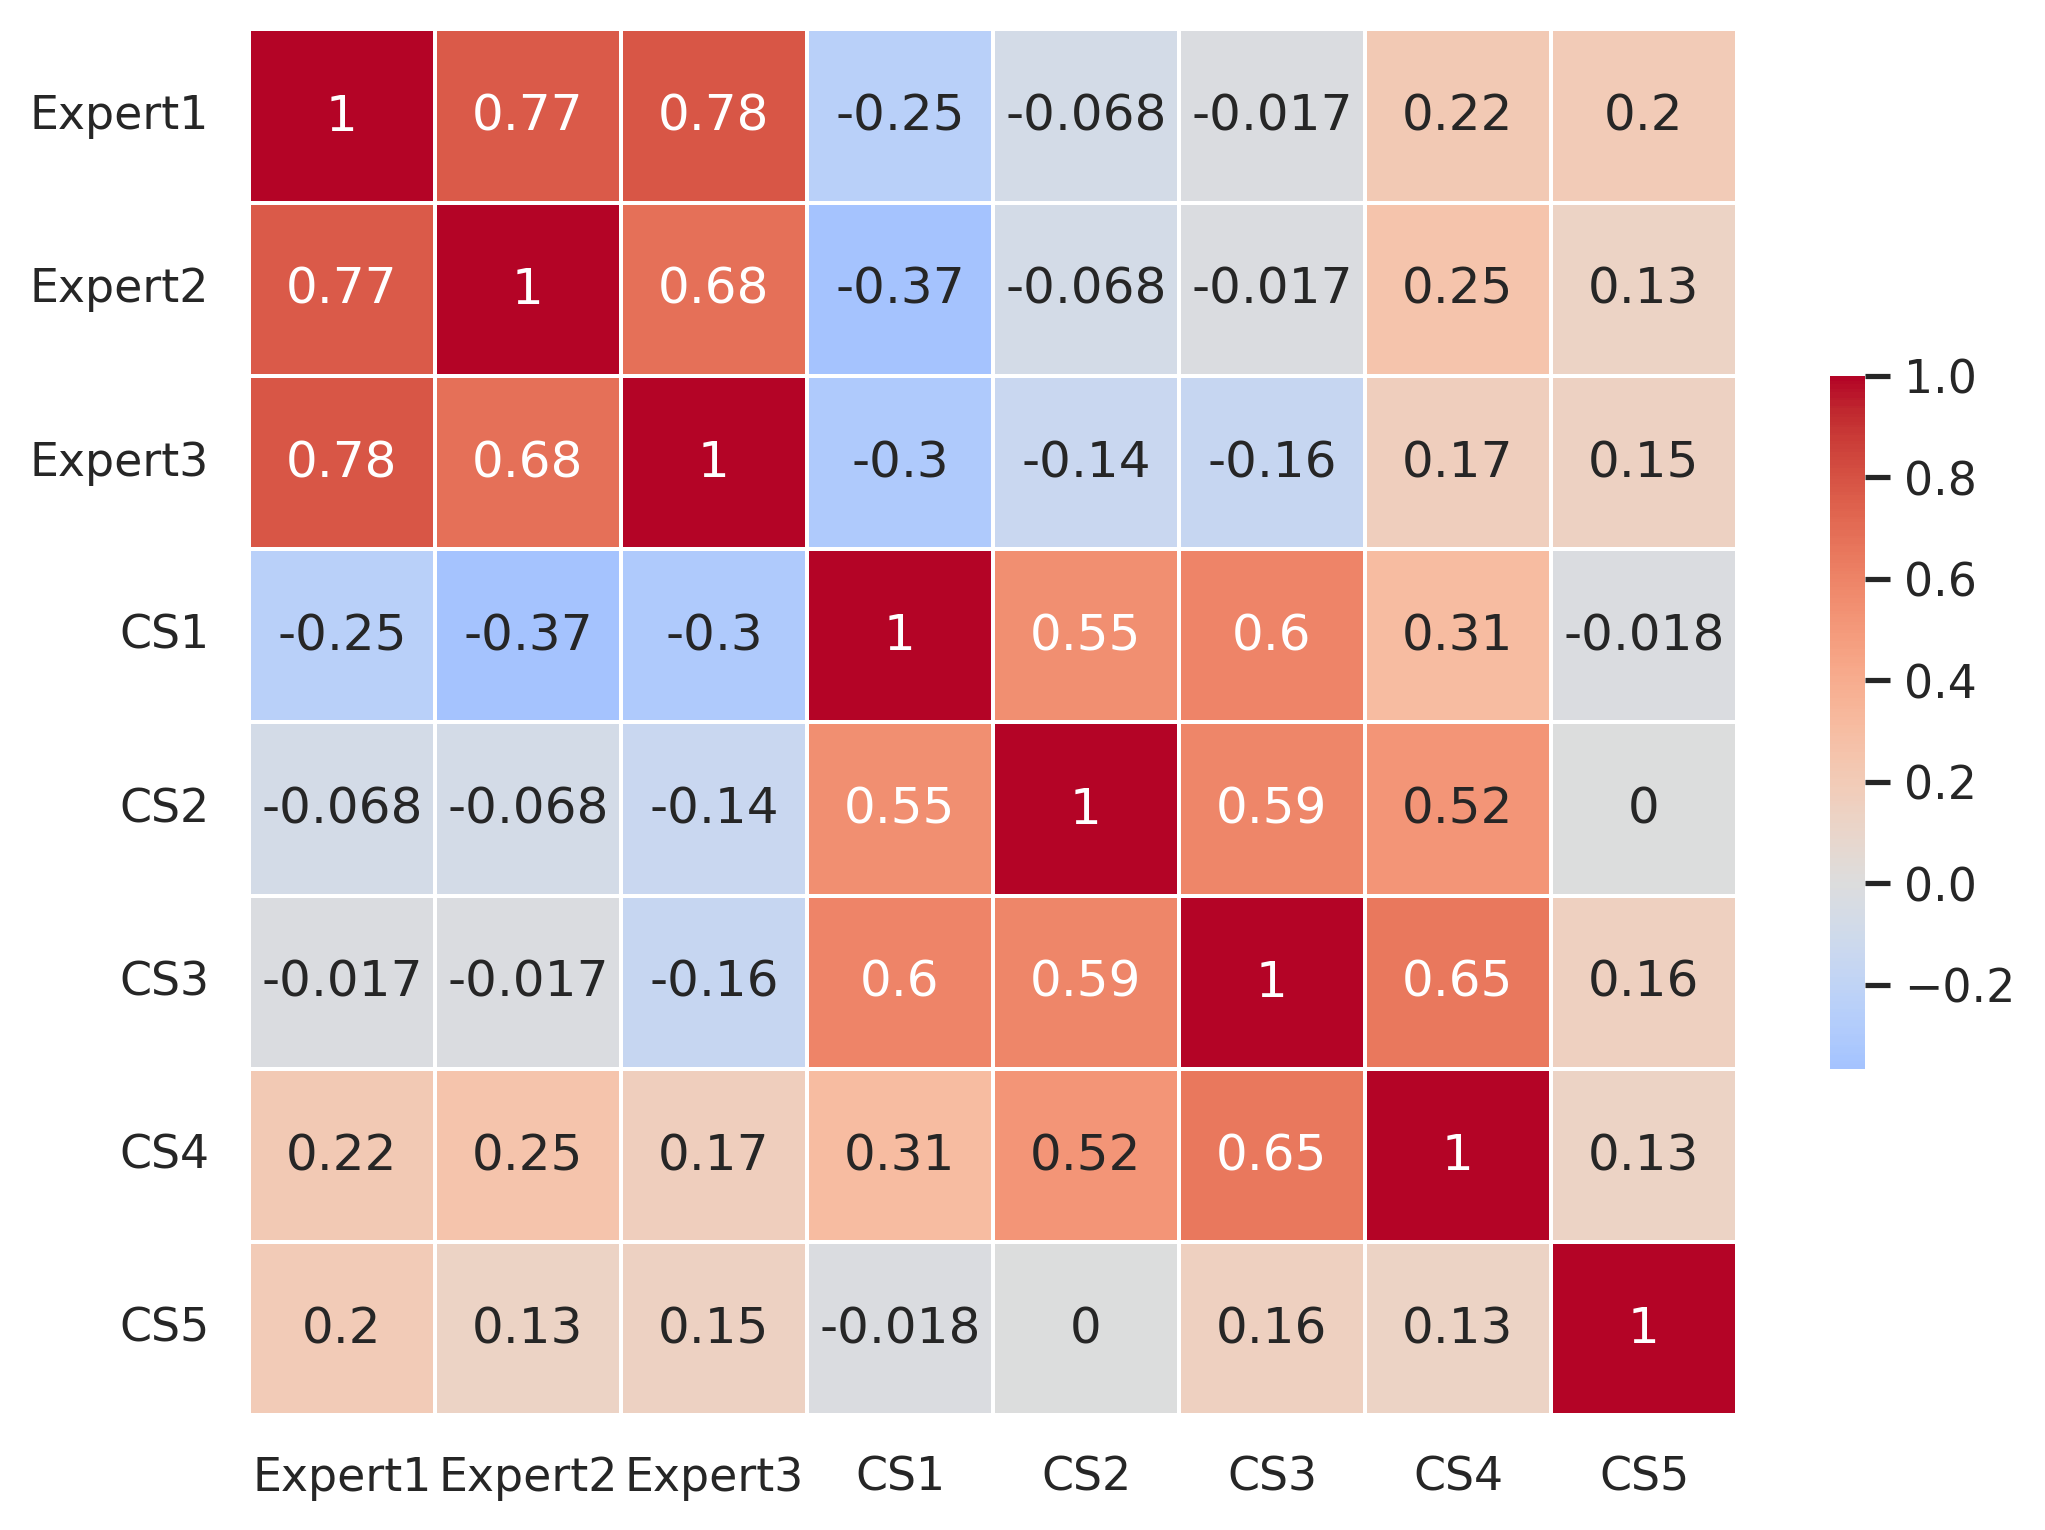

In [13]:
#relevance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 示例数据

data = pd.DataFrame({
    'Expert1':[3.26, 4.0, 3.91, 3.93, 3.84, 4.14, 4.15, 4.29, 3.45, 4.27, 4.03, 4.2, 4.26, 3.76, 3.64, 3.49],
    'Expert2':[3.09, 3.87, 4.23, 3.62, 3.76, 3.94, 4.48, 4.71, 3.32, 4.78, 4.0, 4.47, 4.74, 3.56, 3.31, 3.82],
    'Expert3':[3.09, 3.63, 3.31, 3.35, 3.42, 3.46, 3.54, 3.69, 3.12, 3.73, 3.4, 3.74, 3.75, 3.32, 3.18, 3.25],
    'CS1':[4.03, 3.87, 4.13, 4.13, 3.98, 3.95, 4.02, 3.85, 3.9, 3.7, 3.84, 4.07, 3.73, 3.98, 3.98, 3.9],
    'CS2':[4.03, 3.87, 4.14, 4.05, 3.96, 3.93, 3.94, 4.0, 3.77, 3.89, 3.89, 4.02, 3.89, 3.89, 3.95, 4.01],
    'CS3':[3.91, 3.89, 4.16, 4.11, 3.96, 3.91, 4.1, 3.96, 3.86, 3.89, 3.96, 4.15, 3.69, 3.96, 4.02, 3.98],
    'CS4':[3.89, 3.85, 4.05, 4.0, 3.91, 3.88, 3.98, 3.99, 3.84, 3.86, 3.9, 4.02, 4.07, 3.91, 3.98, 3.94],
    'CS5':[3.88, 3.88, 3.92, 3.9675, 3.962, 3.96, 3.97, 3.975, 3.97, 3.966, 3.96, 3.97, 3.96, 3.97, 3.96, 3.9625]
    
})

colors = [(1, 1, 1), (1, 0, 0), (0.5, 0, 0.5)]  # RGB颜色
n_bins = 100  # 用于颜色平滑
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 计算肯德尔系数矩阵
kendall_corr = data.corr(method='kendall')

# 绘制热图
sns.set(style='white')
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Kendall Correlation Heatmap of Different Annotators')
plt.savefig('kendall_correlation_heatmap_relevance.pdf', format='pdf', bbox_inches='tight')
plt.show()



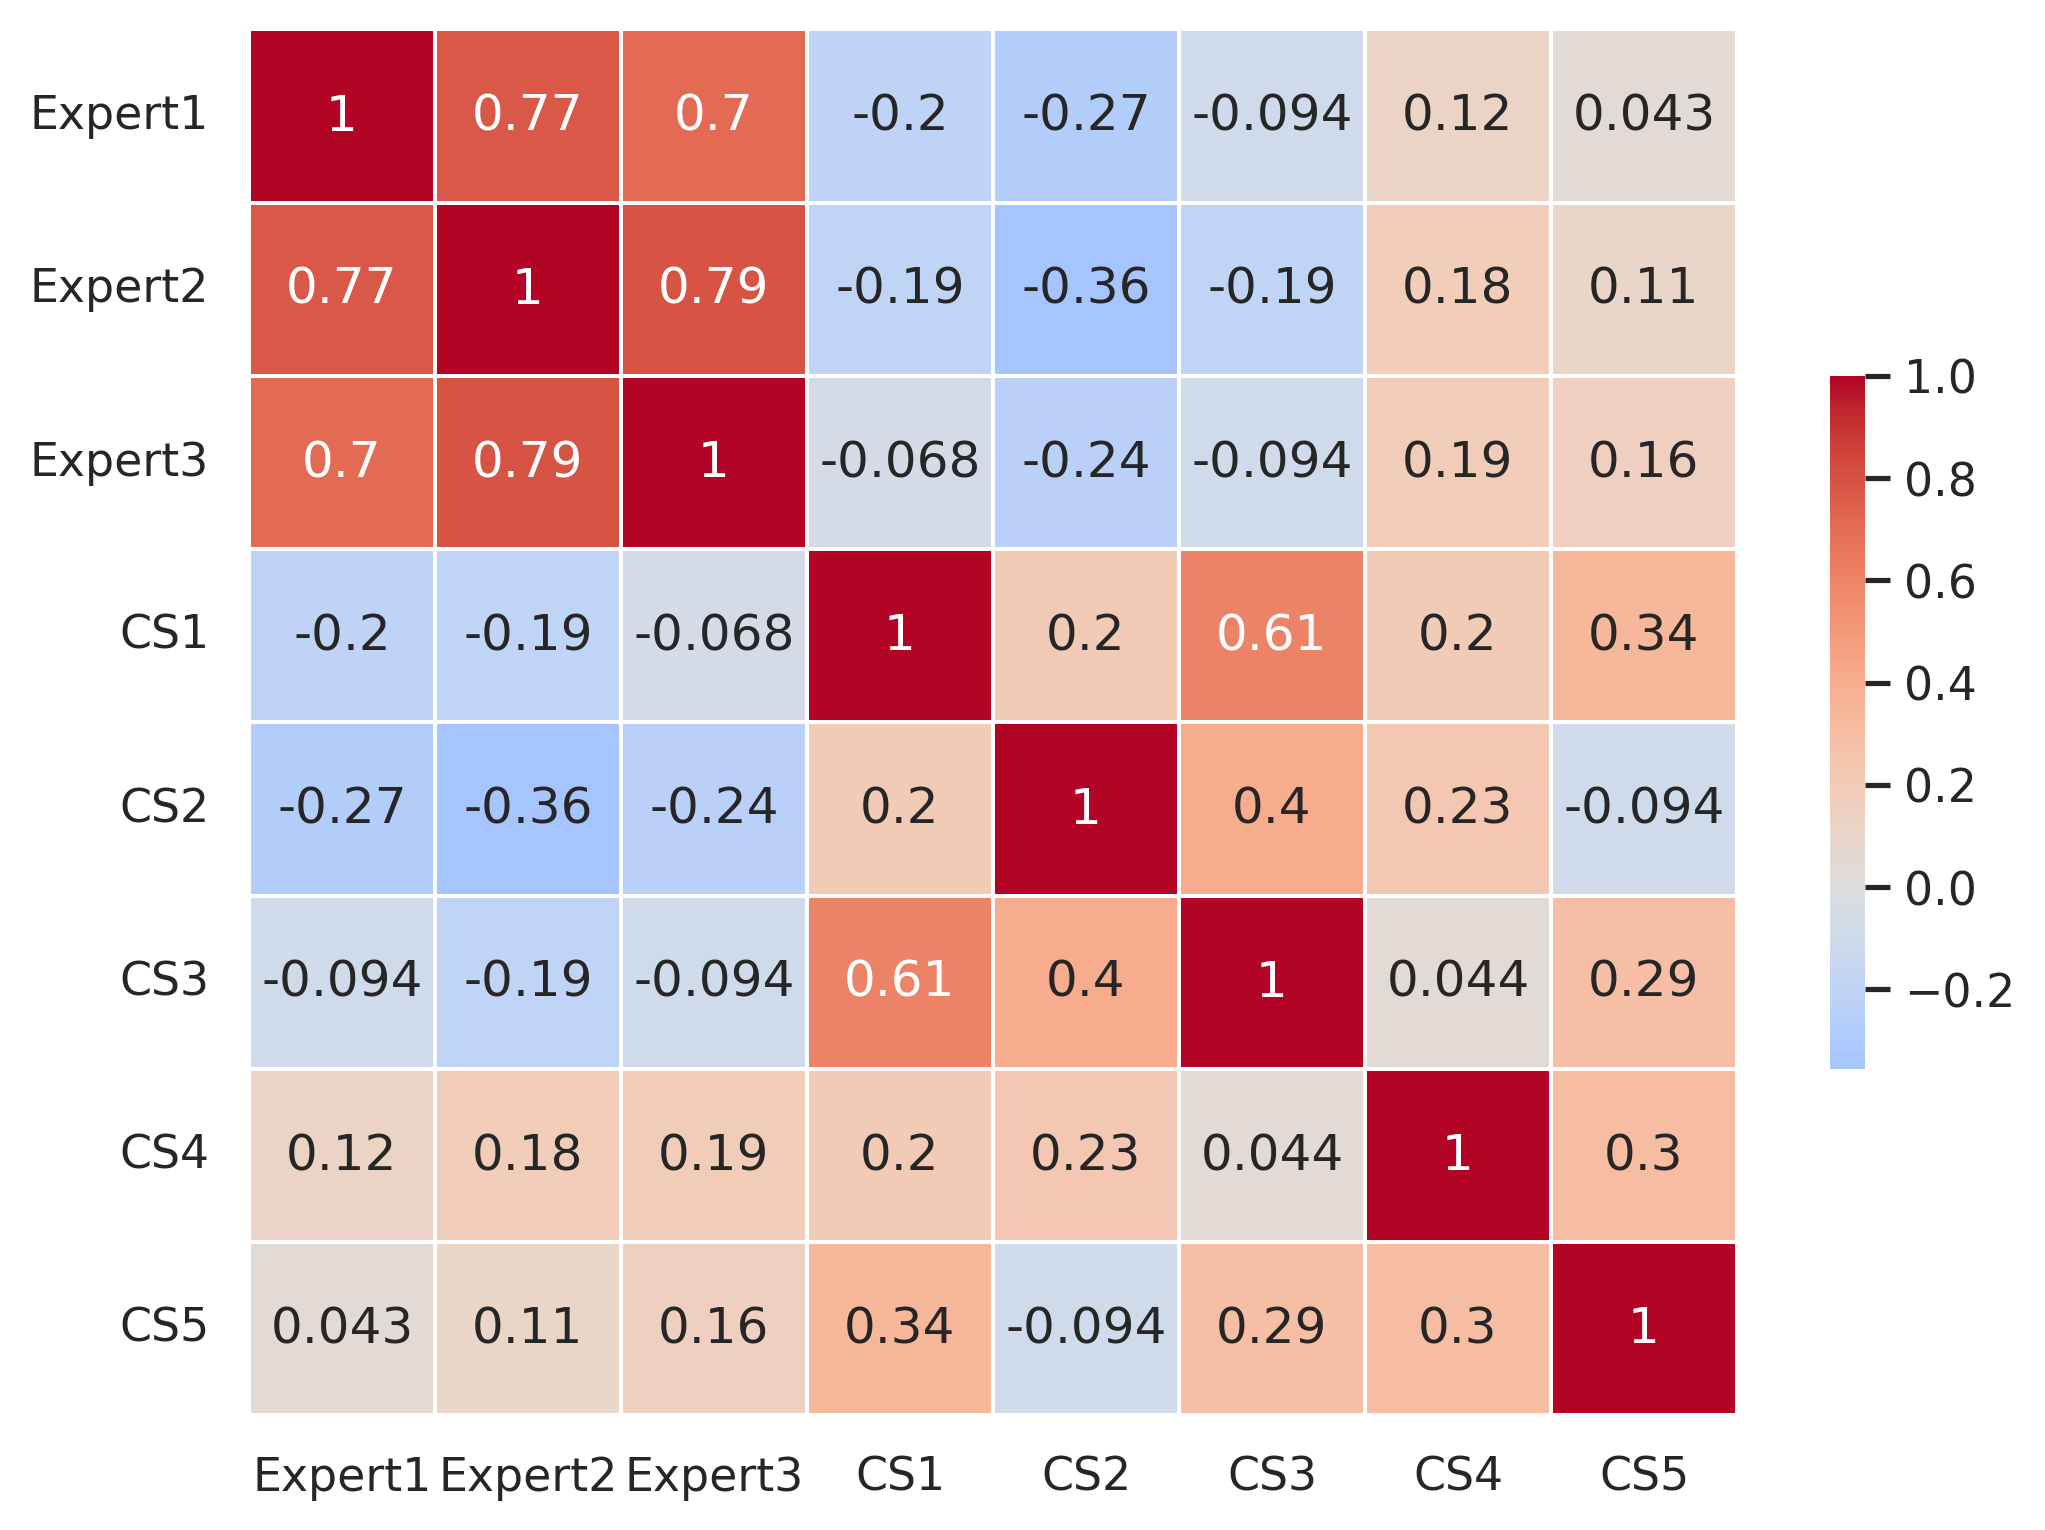

In [3]:

#relevance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 示例数据

data = pd.DataFrame({
    'Expert1': [2.76, 3.9, 3.59, 3.7, 3.81, 4.11, 4.26, 4.13, 3.7, 4.3, 3.81, 4.62, 4.39, 3.69, 3.2, 2.91],
    'Expert2':[1.7, 3.38, 2.99, 3.06, 3.26, 3.63, 3.65, 4.53, 3.89, 4.65, 3.05, 4.23, 4.63, 3.17, 2.46, 1.91],
    'Expert3':[2.38, 3.05, 3.08, 2.83, 2.97, 3.05, 3.22, 3.33, 3.31, 3.54, 2.97, 3.62, 3.52, 3.01, 2.52, 2.33],
    'CS1':[3.79, 3.8, 3.92, 3.97, 3.82, 3.81, 3.78, 3.65, 3.82, 3.83, 3.82, 3.85, 3.67, 3.86, 3.89, 3.75],
    'CS2':[3.79, 3.74, 3.94, 3.9, 3.77, 3.71, 3.8, 3.83, 3.64, 3.73, 3.74, 3.83, 3.73, 3.79, 3.91, 3.85],
    'CS3':[3.65, 3.78, 4.0, 4.04, 3.79, 3.82, 3.86, 3.69, 3.79, 3.71, 3.84, 3.94, 3.67, 3.84, 3.92, 3.78],
    'CS4':[3.7, 3.78, 3.89, 3.81, 3.78, 3.64, 3.76, 3.83, 3.78, 3.8, 3.78, 3.78, 4.01, 3.76, 3.87, 3.77],
    'CS5':[3.72, 3.73, 3.84, 3.91, 3.74, 3.83, 3.81, 3.8, 3.95, 3.79, 3.84, 3.81, 4.04, 3.91, 3.9, 3.7],
    
})


# 计算肯德尔系数矩阵
kendall_corr = data.corr(method='kendall')

# 绘制热图
# sns.set(style='white')
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Kendall Correlation Heatmap of Different Annotators')
plt.savefig('kendall_correlation_heatmap_coherence.pdf', format='pdf', bbox_inches='tight')
plt.show()

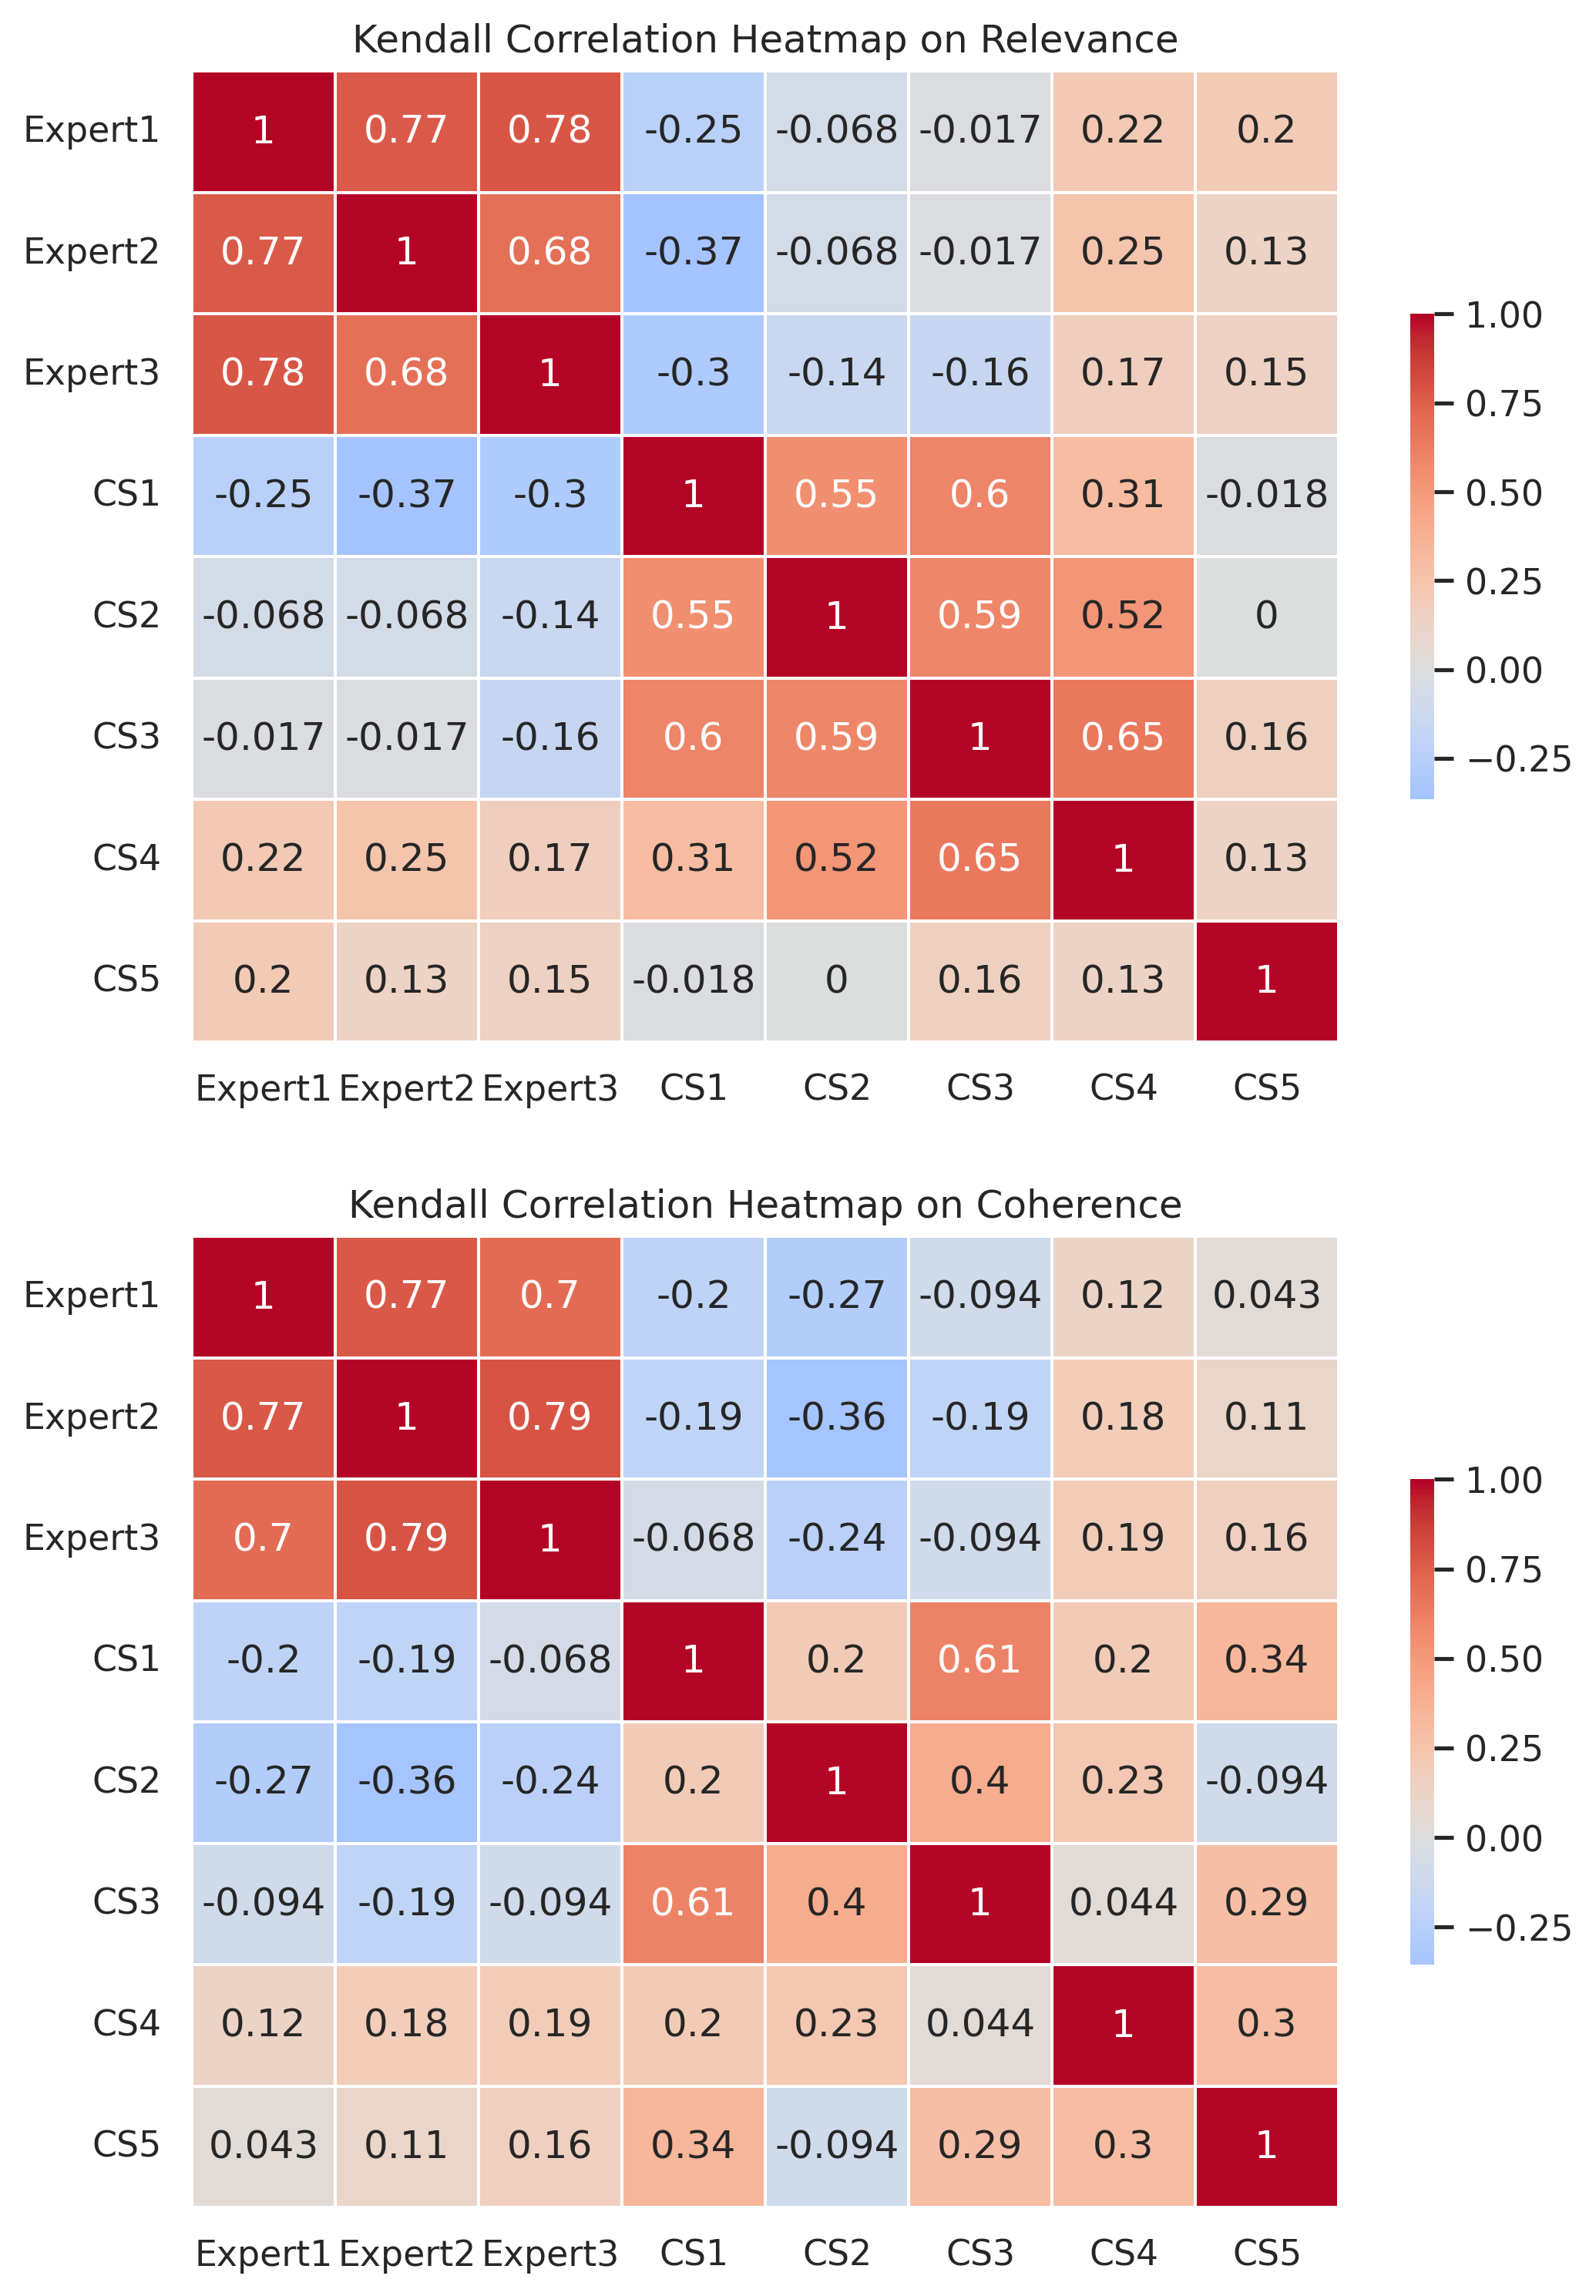

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 示例数据1
data1 = pd.DataFrame({
    'Expert1':[3.26, 4.0, 3.91, 3.93, 3.84, 4.14, 4.15, 4.29, 3.45, 4.27, 4.03, 4.2, 4.26, 3.76, 3.64, 3.49],
    'Expert2':[3.09, 3.87, 4.23, 3.62, 3.76, 3.94, 4.48, 4.71, 3.32, 4.78, 4.0, 4.47, 4.74, 3.56, 3.31, 3.82],
    'Expert3':[3.09, 3.63, 3.31, 3.35, 3.42, 3.46, 3.54, 3.69, 3.12, 3.73, 3.4, 3.74, 3.75, 3.32, 3.18, 3.25],
    'CS1':[4.03, 3.87, 4.13, 4.13, 3.98, 3.95, 4.02, 3.85, 3.9, 3.7, 3.84, 4.07, 3.73, 3.98, 3.98, 3.9],
    'CS2':[4.03, 3.87, 4.14, 4.05, 3.96, 3.93, 3.94, 4.0, 3.77, 3.89, 3.89, 4.02, 3.89, 3.89, 3.95, 4.01],
    'CS3':[3.91, 3.89, 4.16, 4.11, 3.96, 3.91, 4.1, 3.96, 3.86, 3.89, 3.96, 4.15, 3.69, 3.96, 4.02, 3.98],
    'CS4':[3.89, 3.85, 4.05, 4.0, 3.91, 3.88, 3.98, 3.99, 3.84, 3.86, 3.9, 4.02, 4.07, 3.91, 3.98, 3.94],
    'CS5':[3.88, 3.88, 3.92, 3.9675, 3.962, 3.96, 3.97, 3.975, 3.97, 3.966, 3.96, 3.97, 3.96, 3.97, 3.96, 3.9625]
    
})

# 示例数据2
data2 = pd.DataFrame({
    'Expert1': [2.76, 3.9, 3.59, 3.7, 3.81, 4.11, 4.26, 4.13, 3.7, 4.3, 3.81, 4.62, 4.39, 3.69, 3.2, 2.91],
    'Expert2':[1.7, 3.38, 2.99, 3.06, 3.26, 3.63, 3.65, 4.53, 3.89, 4.65, 3.05, 4.23, 4.63, 3.17, 2.46, 1.91],
    'Expert3':[2.38, 3.05, 3.08, 2.83, 2.97, 3.05, 3.22, 3.33, 3.31, 3.54, 2.97, 3.62, 3.52, 3.01, 2.52, 2.33],
    'CS1':[3.79, 3.8, 3.92, 3.97, 3.82, 3.81, 3.78, 3.65, 3.82, 3.83, 3.82, 3.85, 3.67, 3.86, 3.89, 3.75],
    'CS2':[3.79, 3.74, 3.94, 3.9, 3.77, 3.71, 3.8, 3.83, 3.64, 3.73, 3.74, 3.83, 3.73, 3.79, 3.91, 3.85],
    'CS3':[3.65, 3.78, 4.0, 4.04, 3.79, 3.82, 3.86, 3.69, 3.79, 3.71, 3.84, 3.94, 3.67, 3.84, 3.92, 3.78],
    'CS4':[3.7, 3.78, 3.89, 3.81, 3.78, 3.64, 3.76, 3.83, 3.78, 3.8, 3.78, 3.78, 4.01, 3.76, 3.87, 3.77],
    'CS5':[3.72, 3.73, 3.84, 3.91, 3.74, 3.83, 3.81, 3.8, 3.95, 3.79, 3.84, 3.81, 4.04, 3.91, 3.9, 3.7],
    
})

# 计算肯德尔系数矩阵
kendall_corr1 = data1.corr(method='kendall')
kendall_corr2 = data2.corr(method='kendall')

# 创建子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), dpi=300)

# 绘制第一个热图
sns.heatmap(kendall_corr1, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax1)
ax1.set_title('Kendall Correlation Heatmap on Relevance')

# 绘制第二个热图
sns.heatmap(kendall_corr2, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax2)
ax2.set_title('Kendall Correlation Heatmap on Coherence')

# 保存图像
plt.savefig('combined_kendall_correlation_heatmaps.pdf', format='pdf', bbox_inches='tight')
plt.show()
